AxesSubplot(0.125,0.125;0.62x0.755)
 X   Y  value
59  67      1
31  45      1
25  35      1
49  91      1
72  73      1
18  59      1
24  62      1
40  86      1
 6  80      1
42  67      1
15  79      1
84 100      1
33  90      1
23  41      1
86   7     -1
66  42     -1
61   4     -1
36  75      1
70  36     -1
79   5     -1
81  34     -1
81  71     -1
75  37      1
53  64      1
85  48     -1
98   3     -1
72  58     -1
39  13     -1
71  99      1
54  32     -1
72  52     -1
 2  60      1
98  56      1
80  20      1
70  11     -1
88  82     -1
75  59     -1
54  25     -1
 5  79      1
61  52     -1
78  86      1
58  39     -1
43  13     -1
54  46     -1
25  21      1
 1 100      1
45  86      1
26  38      1
69   2      1
71  59     -1


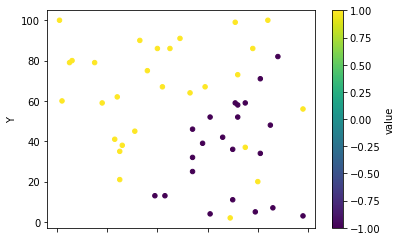

In [119]:
import random
import time
import pandas as pd

w,h = 2,50
data = [[0 for x in range(w)] for y in range(h)] 

random.seed(time.time())

linearly_separable = False

# Initialize points and their values
for i in range(50):
    
    #Create random data point
    data[i][0] = random.randint(1,100)
    data[i][1] = random.randint(1,100)
    
    # Point's position relative to x = y line determines value
    if (data[i][0] >=  data[i][1]):
        data[i].append(1)
    else:
        data[i].append(-1)
        
    # unless we don't want it to be specifically linearly separable
    # then 10% of the time switch the value up
    if (not linearly_separable and random.randint(1,10) % 10):
        data[i][2] *= -1
    

df = pd.DataFrame(data, columns=("X", "Y", "value"))
print(df.plot.scatter(x="X", y="Y", c="value", cmap='viridis'))
print(df.to_string(index=False))

In [120]:
import numpy as np
def pla(x, y, step_size, passes, prediction):
    w=[0,0,0]
    for c in range(passes):
        updated = False
        for i in range(len(x)):
            if y[i] * np.dot(w, x[i]) <= 0: #prediction and the sign of weight vector * points are opposites
                updated = True
                updatePiece = [step_size*y[i]*coord for coord in x[i]]
                w = [sum(i) for i in zip(*[w,updatePiece])]
        if not updated:
            break
    
    if updated == False:
        print("first solution found")
    else:
        print("no solution or first solution found but not verified in the last pass")
    return w
                    

In [121]:
import numpy as np
prediction = np.zeros(50)

#separate the points from values for sake of pla
values=[]
points=[]
for i in range(len(data)):
    values.append(data[i][2])
    points.append([1, data[i][0], data[i][1]]) #1 is neeeded as the first component before the points
    
result = pla(points, values, 1, 100, prediction)
print(result)

no solution or first solution found but not verified in the last pass
[29, -146, 114]


AxesSubplot(0.125,0.125;0.62x0.755)
[[0, 0.04560810810810811], [100, 102.57939189189189]]


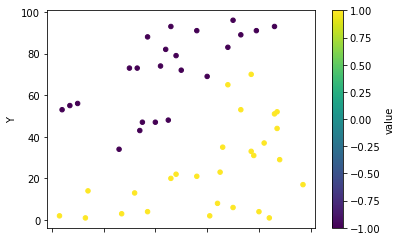

In [118]:
import matplotlib.pyplot as plt
#find two points on the resulting line to plot
def findPoints(array):
    #array = x0 + x1(x) + x2(y) = 0
    #choose x = 0 and x = 100
    point1 = [0,(-1*array[0]) / array[2]]
    point2 = [100, ((-1*array[0]) - array[1]*100) / array[2]]
    return [point1, point2]

df = pd.DataFrame(data, columns=("X", "Y", "value"))
print(df.plot.scatter(x="X", y="Y", c="value", cmap='viridis'))

linePoints = findPoints(result)
print(linePoints)
#plt.plot(linePoints[0], linePoints[1])